##### Code Provided by the tutorial https://youtu.be/QpzMWQvxXWk?si=GeP6Sp7PhkLO6zPa
##### This notebook is only used for learning the possibilities of the NLTK library
##### Following a tutorial

In [7]:
# ! pip install nltk numpy pandas matplotlib seaborn

import re
import string
import nltk 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\timo7\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\timo7\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\timo7\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\timo7\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\timo7\AppData\Roaming\nltk_data...


True

In [9]:
df = pd.read_csv('raw_data/computerscience_hot_posts.csv')

df.head()

,Unnamed: 0,created_utc,title,text,author,score,upvote_ratio,num_comments,url
0,0,1.673829e+09,"Looking for books, videos, or other resources ...",NaN,mobotsar,93,0.99,113,https://www.reddit.com/r/computerscience/comme...
1,1,1.686431e+09,/r/ComputerScience will be going dark starting...,"## Update (June 16th, 2023):\n\nThis subreddit...",nuclear_splines,290,0.97,21,https://www.reddit.com/r/computerscience/comme...
2,2,1.686512e+09,How computers measure time,Can someone explain this to me? I've been told...,RunDiscombobulated67,86,0.98,27,https://www.reddit.com/r/computerscience/comme...
3,3,1.686514e+09,Question About Registers,Hello everyone. There is a misunderstanding I ...,mellowhorses,62,0.97,24,https://www.reddit.com/r/computerscience/comme...
4,4,1.686507e+09,Learning a new skill,"Hey guys,\n\nWanted to ask what a good compute...",Haunting_Document142,30,0.90,38,https://www.reddit.com/r/computerscience/comme...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    100 non-null    int64  
 1   created_utc   100 non-null    float64
 2   title         100 non-null    object 
 3   text          85 non-null     object 
 4   author        97 non-null     object 
 5   score         100 non-null    int64  
 6   upvote_ratio  100 non-null    float64
 7   num_comments  100 non-null    int64  
 8   url           100 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 7.2+ KB


### EDA

In [11]:
df['score'].describe()

count    100.000000
mean      29.720000
std       77.139658
min        0.000000
25%        1.000000
50%        8.000000
75%       30.250000
max      691.000000
Name: score, dtype: float64

Text(0.5, 1.0, 'Half of The Posts have less than or equal 8 Upvotes')

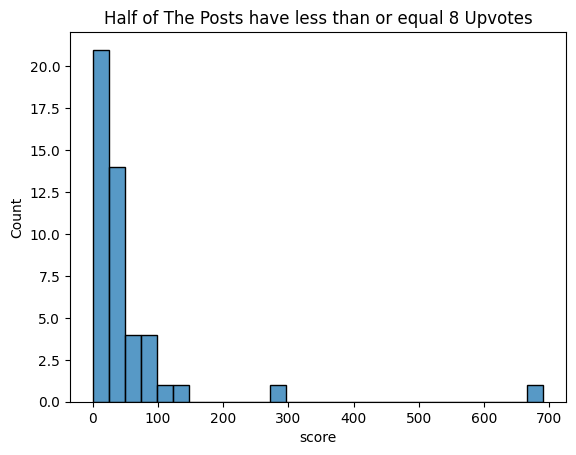

In [12]:
sns.histplot(pd.DataFrame(df['score'].value_counts(10)), x='score', binwidth=25).set_title("Half of The Posts have less than or equal 8 Upvotes")


In [13]:
df['author'].value_counts(normalize=False).head(10)

author
albeXL                11
luciferreeves          2
Squixell               2
shai-ber               2
HeadClicker52          2
PoliteRuleFollower     2
veterinarysite         2
jarekduda              1
rojoroboto             1
tentmap                1
Name: count, dtype: int64

### Text Pre-Processing

In [14]:
example_text = df['text'][5]
print(example_text)

I'm interested in many fields of CS so any event that you think is interesting, I will be looking it up. Though currently, I am interested the most in 3D graphics generation, data visualization, game dev, AR/VR and AI. I also have some experience in web dev, but not as much interest(still, will also be looking them up at least once).

Oh and an extra question: Which subreddit(s) would you recommend for being involved in and informed about these events?


In [15]:
tokens = word_tokenize(str(example_text))
tokens[:15]

['I',
 "'m",
 'interested',
 'in',
 'many',
 'fields',
 'of',
 'CS',
 'so',
 'any',
 'event',
 'that',
 'you',
 'think',
 'is']

In [16]:
tagged = pos_tag(tokens)
tagged[:15]

[('I', 'PRP'),
 ("'m", 'VBP'),
 ('interested', 'JJ'),
 ('in', 'IN'),
 ('many', 'JJ'),
 ('fields', 'NNS'),
 ('of', 'IN'),
 ('CS', 'NNP'),
 ('so', 'IN'),
 ('any', 'DT'),
 ('event', 'NN'),
 ('that', 'IN'),
 ('you', 'PRP'),
 ('think', 'VBP'),
 ('is', 'VBZ')]

In [17]:
entities = ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  'm/VBP
  interested/JJ
  in/IN
  many/JJ
  fields/NNS
  of/IN
  CS/NNP
  so/IN
  any/DT
  event/NN
  that/IN
  you/PRP
  think/VBP
  is/VBZ
  interesting/JJ
  ,/,
  I/PRP
  will/MD
  be/VB
  looking/VBG
  it/PRP
  up/RP
  ./.
  Though/NNP
  currently/RB
  ,/,
  I/PRP
  am/VBP
  interested/JJ
  the/DT
  most/RBS
  in/IN
  3D/CD
  graphics/NNS
  generation/NN
  ,/,
  data/NNS
  visualization/NN
  ,/,
  game/NN
  dev/NN
  ,/,
  AR/VR/NNP
  and/CC
  (ORGANIZATION AI/NNP)
  ./.
  I/PRP
  also/RB
  have/VBP
  some/DT
  experience/NN
  in/IN
  web/NN
  dev/NN
  ,/,
  but/CC
  not/RB
  as/RB
  much/JJ
  interest/NN
  (/(
  still/RB
  ,/,
  will/MD
  also/RB
  be/VB
  looking/VBG
  them/PRP
  up/RP
  at/IN
  least/JJS
  once/RB
  )/)
  ./.
  Oh/UH
  and/CC
  an/DT
  extra/JJ
  question/NN
  :/:
  Which/JJ
  subreddit/NN
  (/(
  s/NN
  )/)
  would/MD
  you/PRP
  recommend/VB
  for/IN
  being/VBG
  involved/VBN
  in/IN
  and/CC
  informed/VBD
  about/IN
  these/DT
  events/NNS
  ?/.)

### VADER Sentiment Analysis

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

### Compound value goes from -1 to 1, from negative to positive

In [19]:
sia.polarity_scores("I am so happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [20]:
sia.polarity_scores("This is the worst thing ever!")

{'neg': 0.468, 'neu': 0.532, 'pos': 0.0, 'compound': -0.6588}

In [21]:
sia.polarity_scores(example_text)

{'neg': 0.0, 'neu': 0.892, 'pos': 0.108, 'compound': 0.7783}

In [51]:
len(df)

100

In [52]:
res = []

for index, row in df.iterrows():
    print(index)
    try:
        res.append(sia.polarity_scores(row['text']))
    except Exception:
        res.append(
            {
                'neg': None,
                'neu': None,
                'pos': None,
                'compound': None
            }
        )


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [53]:
vader = pd.DataFrame.from_records(res)
vader.head()

,neg,neu,pos,compound
0,NaN,NaN,NaN,NaN
1,0.086,0.841,0.073,-0.8727
2,0.037,0.846,0.117,0.7220
3,0.053,0.835,0.112,0.8553
4,0.041,0.744,0.215,0.8885


In [60]:
vader_df = vader.reset_index().rename(columns={'index': 'Unnamed: 0'}).merge(df, how='left')
vader_df.head(15)

,Unnamed: 0,neg,neu,pos,compound,created_utc,title,text,author,score,upvote_ratio,num_comments,url
0,0,NaN,NaN,NaN,NaN,1.673829e+09,"Looking for books, videos, or other resources ...",NaN,mobotsar,93,0.99,113,https://www.reddit.com/r/computerscience/comme...
1,1,0.086,0.841,0.073,-0.8727,1.686431e+09,/r/ComputerScience will be going dark starting...,"## Update (June 16th, 2023):\n\nThis subreddit...",nuclear_splines,290,0.97,21,https://www.reddit.com/r/computerscience/comme...
2,2,0.037,0.846,0.117,0.7220,1.686512e+09,How computers measure time,Can someone explain this to me? I've been told...,RunDiscombobulated67,86,0.98,27,https://www.reddit.com/r/computerscience/comme...
3,3,0.053,0.835,0.112,0.8553,1.686514e+09,Question About Registers,Hello everyone. There is a misunderstanding I ...,mellowhorses,62,0.97,24,https://www.reddit.com/r/computerscience/comme...
4,4,0.041,0.744,0.215,0.8885,1.686507e+09,Learning a new skill,"Hey guys,\n\nWanted to ask what a good compute...",Haunting_Document142,30,0.90,38,https://www.reddit.com/r/computerscience/comme...
5,5,0.000,0.892,0.108,0.7783,1.686502e+09,"Recommendations of Hackathons, GameJams, Tech ...",I'm interested in many fields of CS so any eve...,trojaneo,32,0.89,8,https://www.reddit.com/r/computerscience/comme...
6,6,0.000,0.875,0.125,0.8932,1.686407e+09,Any CS books which present their subject chron...,I recently read calculus reordered and Real An...,ingsocks,78,0.94,13,https://www.reddit.com/r/computerscience/comme...
7,7,0.027,0.815,0.158,0.9906,1.686409e+09,Best Practices using LaTeX.,I have just finished my first seventy page the...,Sorry_Scale_1064,32,0.88,7,https://www.reddit.com/r/computerscience/comme...
8,8,0.000,0.970,0.030,0.1531,1.686431e+09,Pumping lemma Question,I have 2 languages the first one is regular an...,Melodic-Scheme8794,9,0.92,7,https://www.reddit.com/r/computerscience/comme...
9,9,0.058,0.897,0.045,-0.3423,1.686346e+09,I don't understand the Halting Problem,"The key to the solution, from what I've got so...",androt14_,51,0.88,47,https://www.reddit.com/r/computerscience/comme...


### Visualizations

##### Word Cloud

In [85]:
!pip install wordcloud

from wordcloud import WordCloud
from PIL import Image
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\timo7\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
# remove Stop Words from Vocabulary
vocab = vader_df.dropna()['text'].str.replace(r'\?|\.|\'', ' ')

vocab = ' '.join(vocab)
vocab = ' '.join([i for i in vocab.split(' ') if i not in stopwords.words('english')])

### Some Rough Idea of our Wordcloud, we can also make it into the shape of Reddit if we want

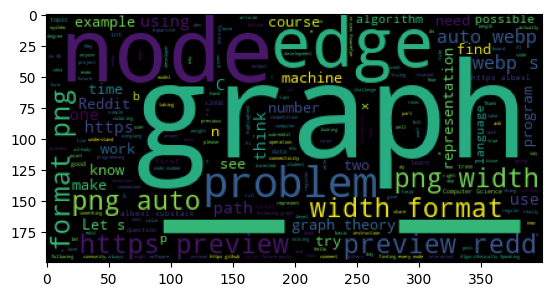

In [90]:
wc = WordCloud().generate(vocab)
plt.imshow(wc)

### Separate Scores into Bins, then see if sentiment analysis correlates with score

In [92]:
pd.qcut(vader_df['score'], q=4)

0     (30.25, 691.0]
1     (30.25, 691.0]
2     (30.25, 691.0]
3     (30.25, 691.0]
4       (8.0, 30.25]
           ...      
95    (30.25, 691.0]
96        (1.0, 8.0]
97    (30.25, 691.0]
98     (-0.001, 1.0]
99    (30.25, 691.0]
Name: score, Length: 100, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 1.0] < (1.0, 8.0] < (8.0, 30.25] < (30.25, 691.0]]

In [95]:
vader_df['bin_score'] = pd.qcut(vader_df['score'], q=4)


In [103]:
vader_df['bin_score'].value_counts()

bin_score
(-0.001, 1.0]     28
(30.25, 691.0]    25
(8.0, 30.25]      24
(1.0, 8.0]        23
Name: count, dtype: int64

<Axes: xlabel='bin_score', ylabel='pos'>

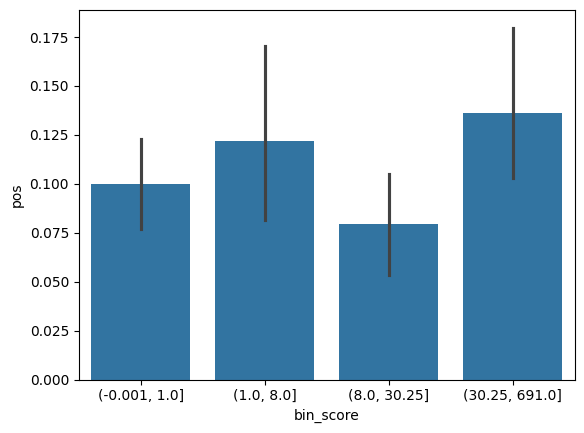

In [109]:
sns.barplot(vader_df, x='bin_score', y='pos')

<Axes: xlabel='bin_score', ylabel='neg'>

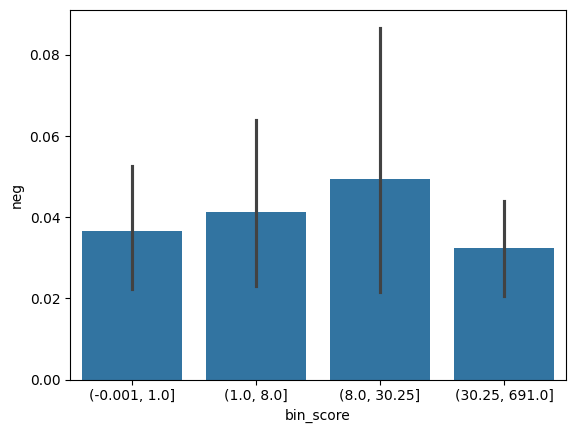

In [110]:
sns.barplot(vader_df, x='bin_score', y='neg')

<Axes: xlabel='bin_score', ylabel='neu'>

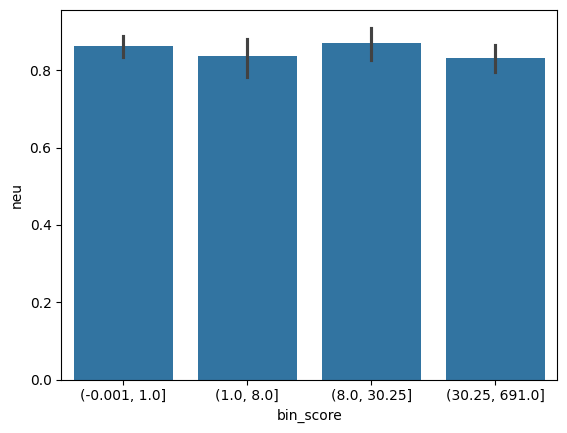

In [111]:
sns.barplot(vader_df, x='bin_score', y='neu')

In [96]:
vader_df.plot(kind='bar', stacked=True, x='bin_score', y)

,Unnamed: 0,neg,neu,pos,compound,created_utc,title,text,author,score,upvote_ratio,num_comments,url,bin_score
0,0,NaN,NaN,NaN,NaN,1.673829e+09,"Looking for books, videos, or other resources ...",NaN,mobotsar,93,0.99,113,https://www.reddit.com/r/computerscience/comme...,"(30.25, 691.0]"
1,1,0.086,0.841,0.073,-0.8727,1.686431e+09,/r/ComputerScience will be going dark starting...,"## Update (June 16th, 2023):\n\nThis subreddit...",nuclear_splines,290,0.97,21,https://www.reddit.com/r/computerscience/comme...,"(30.25, 691.0]"
2,2,0.037,0.846,0.117,0.7220,1.686512e+09,How computers measure time,Can someone explain this to me? I've been told...,RunDiscombobulated67,86,0.98,27,https://www.reddit.com/r/computerscience/comme...,"(30.25, 691.0]"
3,3,0.053,0.835,0.112,0.8553,1.686514e+09,Question About Registers,Hello everyone. There is a misunderstanding I ...,mellowhorses,62,0.97,24,https://www.reddit.com/r/computerscience/comme...,"(30.25, 691.0]"
4,4,0.041,0.744,0.215,0.8885,1.686507e+09,Learning a new skill,"Hey guys,\n\nWanted to ask what a good compute...",Haunting_Document142,30,0.90,38,https://www.reddit.com/r/computerscience/comme...,"(8.0, 30.25]"
